In [ ]:
from google.colab import drive
drive.mount('/content/drive'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import os

new_list = []
for root, dirs, files in os.walk("/content/drive/MyDrive/Data/Data/Training"):
    for file in files:
        if file.endswith('.txt'):
            try:
                with open(os.path.join(root, file), 'r') as f:
                    text = f.read()
                    text = text.replace("alt :", "").replace("des :", "").replace("Title :", "").replace("Title:", "").replace("alt:", "").replace("des:", "").replace("title:","").replace("title: ","")
                    new_list.append(text)
            except Exception as e:
                print(f"Error reading {file}: {str(e)}")
print(new_list)

[' Samsung Galaxy A73 5G ra mắt khi nào? Giá bao nhiêu? Có nên mua không?\ttitle : Samsung Galaxy A73 5G ra mắt khi nào ? Giá bao nhiêu ? Có nên mua không ?\n\nVào tháng 04/2022,  Samsung  cho ra mắt Samsung Galaxy A73 5G tại thị trường Việt Nam.\tVào tháng 04 / 2022 , Samsung cho ra mắt Samsung Galaxy A73 5G tại thị trường Việt Nam .\n\nSản phẩm dự kiến sẽ là một trong những mẫu  điện thoại  nổi bật trong dòng  Galaxy A .\tSản phẩm dự kiến sẽ là một trong những mẫu điện thoại nổi bật trong dòng Galaxy A .\n\nCùng tìm hiểu giá bán  Samsung Galaxy A73 5G  và một số thông tin về sản phẩm này.\tCùng tìm hiểu giá bán Samsung Galaxy A73 5G và một số thông tin về sản phẩm này .\n\n1.\t1 .\n\nĐiện thoại Samsung Galaxy A73 5G ra mắt khi nào?\tĐiện thoại Samsung Galaxy A73 5G ra mắt khi nào ?\n\nVào đầu tháng 04/2022 Samsung Galaxy A73 5G được chính thức mở bán tại thị trường Việt Nam.\tVào đầu tháng 04 / 2022 Samsung Galaxy A73 5G được chính thức mở bán tại thị trường Việ

In [ ]:

import re
import json
data = []

for text in new_list:
    matches = re.findall(r'\{.*?\}', text)
    for match in matches:
        try:
            json_data = json.loads(match)
            data.append(json_data)
        except json.JSONDecodeError as e:
            print(f"Lỗi xử lý JSON: {e}")

train_df = pd.DataFrame(data)

In [ ]:
train_df = pd.DataFrame(data)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1089 entries, 0 to 1088
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   subject    1089 non-null   object
 1   object     1089 non-null   object
 2   aspect     1089 non-null   object
 3   predicate  1089 non-null   object
 4   label      1089 non-null   object
dtypes: object(5)
memory usage: 42.7+ KB


In [ ]:
new_data = []
for item in data:
    new_item = {}
    for key, values in item.items():
        if key in ['subject', 'object', 'aspect', 'predicate']:
            new_values = []
            for value in values:
                parts = value.split("&&")
                if len(parts) == 2:
                    new_values.append({parts[0]: parts[1]})
            new_item[key] = new_values
        else:
            new_item[key] = values

    new_data.append(new_item)
train_df = pd.DataFrame(new_data)
train_df['label'] = train_df['label'].astype("category")
train_df.head()

,subject,object,aspect,predicate,label
0,"[{'8': 'chiếc'}, {'9': 'mày'}, {'10': 'này'}]","[{'14': 'các'}, {'15': 'thế'}, {'16': 'hệ'}...","[{'5': 'thiết'}, {'6': 'kế'}]","[{'11': 'khá'}, {'12': 'giống'}]",EQL
1,"[{'20': 'Samsung'}, {'21': 'Galaxy'}, {'22': '...","[{'11': 'các'}, {'12': 'sản'}, {'13': 'phẩm'},...","[{'4': 'nhiều'}, {'5': 'tính'}, {'6': 'năng'}]","[{'7': 'vượt'}, {'8': 'trội'}]",COM+
2,"[{'1': 'Cả'}, {'2': 'ba'}, {'3': 'chiếc'}, {'4...",[],"[{'8': 'thông'}, {'9': 'số'}, {'10': 'camera'}]","[{'11': 'đỉnh'}, {'12': 'cao'}, {'13': 'nhất'}...",SUP+
3,[{'14': 'OPPO'}],[{'2': 'Samsung'}],"[{'24': 'các'}, {'25': 'chi'}, {'26': 'tiết'}]","[{'31': 'hài'}, {'32': 'hoà'}, {'33': ','}, {'...",COM+
4,[{'4': 'Samsung'}],[],"[{'12': 'khả'}, {'13': 'năng'}, {'14': 'zoom'}]","[{'5': 'vượt'}, {'6': 'trội'}, {'7': 'hơn'}, {...",COM+


In [ ]:

train_df['subject_clean'] = train_df['subject'].apply(lambda x: ' '.join([next(iter(d.values())) for d in x]))
train_df['object_clean'] = train_df['object'].apply(lambda x: ' '.join([next(iter(d.values())) for d in x]))
train_df['aspect_clean'] = train_df['aspect'].apply(lambda x: ' '.join([next(iter(d.values())) for d in x]))
train_df['predicate_clean'] = train_df['predicate'].apply(lambda x: ' '.join([next(iter(d.values())) for d in x]))

In [ ]:
train_df['subject_clean'] = train_df['subject_clean'].apply(lambda x: x.lower())
train_df['object_clean'] = train_df['object_clean'].apply(lambda x: x.lower())
train_df['aspect_clean'] = train_df['aspect_clean'].apply(lambda x: x.lower())
train_df['predicate_clean'] = train_df['predicate_clean'].apply(lambda x: x.lower())

In [ ]:
# Tạo cột mới "sentences_cleaned"
train_df['sentences_cleaned'] = ''


# Duyệt qua từng dòng trong DataFrame
for index, row in train_df.iterrows():
    cleaned_text = []

    # Trích xuất giá trị từ các từ điển và ghép thành chuỗi
    for item in row['subject']:
        cleaned_text.append(next(iter(item.values())))
    for item in row['object']:
        if next(iter(item.values())) not in cleaned_text:
            cleaned_text.append(next(iter(item.values())))
    for item in row['aspect']:
        if next(iter(item.values())) not in cleaned_text:
            cleaned_text.append(next(iter(item.values())))
    for item in row['predicate']:
        if next(iter(item.values())) not in cleaned_text:
            cleaned_text.append(next(iter(item.values())))

    # Chuyển đổi thành lowercase
    cleaned_text = ' '.join(cleaned_text).lower()

    # Gán giá trị cho cột "sentences_cleaned"
    train_df.at[index, 'sentence_cleaned'] = cleaned_text

# In ra và kiểm tra DataFrame đã được cập nhật
train_df = train_df.drop('sentences_cleaned', axis=1)
train_df

,subject,object,aspect,predicate,label,subject_clean,object_clean,aspect_clean,predicate_clean,sentence_cleaned
0,"[{'8': 'chiếc'}, {'9': 'mày'}, {'10': 'này'}]","[{'14': 'các'}, {'15': 'thế'}, {'16': 'hệ'}...","[{'5': 'thiết'}, {'6': 'kế'}]","[{'11': 'khá'}, {'12': 'giống'}]",EQL,chiếc mày này,các thế hệ tiền nhiệm,thiết kế,khá giống,chiếc mày này các thế hệ tiền nhiệm th...
1,"[{'20': 'Samsung'}, {'21': 'Galaxy'}, {'22': '...","[{'11': 'các'}, {'12': 'sản'}, {'13': 'phẩm'},...","[{'4': 'nhiều'}, {'5': 'tính'}, {'6': 'năng'}]","[{'7': 'vượt'}, {'8': 'trội'}]",COM+,samsung galaxy a73 5g,các sản phẩm khác trong cùng phân khúc,nhiều tính năng,vượt trội,samsung galaxy a73 5g các sản phẩm khác trong ...
2,"[{'1': 'Cả'}, {'2': 'ba'}, {'3': 'chiếc'}, {'4...",[],"[{'8': 'thông'}, {'9': 'số'}, {'10': 'camera'}]","[{'11': 'đỉnh'}, {'12': 'cao'}, {'13': 'nhất'}...",SUP+,cả ba chiếc máy,,thông số camera,đỉnh cao nhất thế giới smartphone hiện tại,cả ba chiếc máy thông số camera đỉnh cao nhất ...
3,[{'14': 'OPPO'}],[{'2': 'Samsung'}],"[{'24': 'các'}, {'25': 'chi'}, {'26': 'tiết'}]","[{'31': 'hài'}, {'32': 'hoà'}, {'33': ','}, {'...",COM+,oppo,samsung,các chi tiết,"hài hoà , dễ chịu hơn","oppo samsung các chi tiết hài hoà , dễ chịu hơn"
4,[{'4': 'Samsung'}],[],"[{'12': 'khả'}, {'13': 'năng'}, {'14': 'zoom'}]","[{'5': 'vượt'}, {'6': 'trội'}, {'7': 'hơn'}, {...",COM+,samsung,,khả năng zoom,vượt trội hơn hẳn,samsung khả năng zoom vượt trội hơn hẳn
...,...,...,...,...,...,...,...,...,...,...
1084,[],"[{'13': 'Snapdragon'}, {'14': '8'}, {'15': 'Ge...",[],"[{'19': 'hơi'}, {'20': 'thấp'}, {'21': 'một'},...",COM-,,snapdragon 8 gen 1,,hơi thấp một chút,snapdragon 8 gen 1 hơi thấp một chút
1085,[],"[{'10': 'Snapdragon'}, {'11': '8'}, {'12': 'Ge...","[{'1': 'Số'}, {'2': 'điểm'}]","[{'4': 'cao'}, {'5': 'hơn'}, {'6': 'rất'}, {'7...",COM+,,snapdragon 8 gen 1,số điểm,cao hơn rất nhiều,snapdragon 8 gen 1 số điểm cao hơn rất nhiều
1086,[],"[{'26': 'Dimensity'}, {'27': '9000'}]","[{'1': 'Số'}, {'2': 'điểm'}]","[{'4': 'cao'}, {'5': 'hơn'}, {'6': 'rất'}, {'7...",COM+,,dimensity 9000,số điểm,cao hơn rất nhiều,dimensity 9000 số điểm cao hơn rất nhiều
1087,"[{'5': 'ống'}, {'6': 'kính'}, {'7': 'góc'}, {'...","[{'18': 'ống'}, {'19': 'kính'}, {'20': 'chính'}]",[],"[{'9': 'không'}, {'10': 'có'}, {'11': 'quá'}, ...",EQL,ống kính góc rộng,ống kính chính,,không có quá nhiều sự khác biệt,ống kính góc rộng chính không có quá nhiều sự ...


In [ ]:
train_df.to_excel('/content/drive/MyDrive/Data.xlsx', index=False)

In [ ]:
# Đếm số lượng dấu tab trong mỗi câu(Các câu được cách nhau bởi dấu tab)
tab_counts = [sentence.count('\t') for sentence in new_list]
sum = 0
for index, count in enumerate(tab_counts, start=1):
    sum+=count
print(f"Tổng số câu là: ", sum)

Tổng số câu là:  4171


In [ ]:
# Khởi tạo biến đếm
num_comp_sentences = 0
# num_subjects = 0
# num_objects = 0
# num_aspects = 0
# num_labels = 0

# Duyệt qua các phần tử trong new_list
for text in new_list:

  # Tách thành các câu riêng biệt bởi ký tự tab
  sentences = text.split('\t')

  # Duyệt qua các câu
  for sentence in sentences:

    # Kiểm tra từng câu có chứa các từ khóa không
    if any(word in sentence for word in ['subject', 'object', 'aspect', 'predicate', 'label']):
      num_comp_sentences += 1

  # for sentence in sentences:
  #   if any(word in sentence for word in ['subject']):
  #     num_subjects += 1
  # for sentence in sentences:
  #   if any(word in sentence for word in ['object']):
  #     num_objects += 1


print(f"Số câu so sánh: {num_comp_sentences}")
# print(f"Số subject: {num_subjects}")
# print(f"Số subject: {num_objects}")

Số câu so sánh: 812


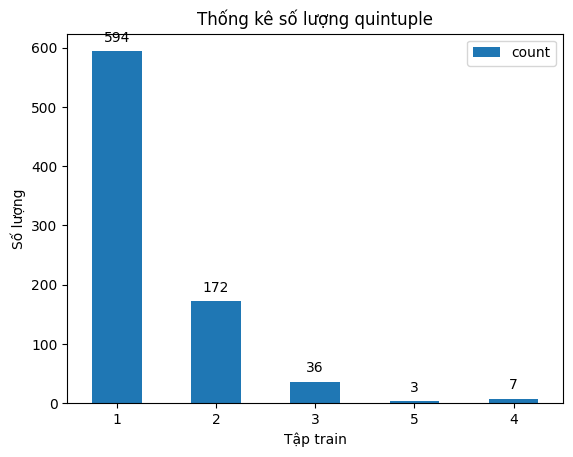

In [ ]:
from collections import defaultdict

# Tạo dict để đếm số lượng
num_quintuples = defaultdict(int)

for text in new_list:

  sentences = text.split('\t')

  for sentence in sentences:

    if any(word in sentence for word in ['subject', 'object', 'aspect', 'predicate', 'label']):

      # Đếm số lượng quintuple trong câu
      count = sentence.count('{')
      num_quintuples[count] += 1

# Chuyển kết quả sang dataframe
quintuple_df = pd.DataFrame.from_dict(num_quintuples, orient='index', columns=['count'])

# Vẽ biểu đồ cột
ax = quintuple_df.plot.bar( y='count', rot=0)

ax.set_xlabel('Tập train')
ax.set_ylabel('Số lượng')
ax.set_title('Thống kê số lượng quintuple')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

In [ ]:
train_df.describe()

,subject,object,aspect,predicate,label,subject_clean,object_clean,aspect_clean,predicate_clean,sentence_cleaned
count,1089,1089,1089,1089,1089,1089,1089,1089,1089,1089
unique,701,487,842,918,8,405,346,536,626,1063
top,[],[],[],"[{'11': 'tốt'}, {'12': 'hơn'}]",COM+,,,,tốt hơn,chụp macro chi tiết nhiều hơn
freq,128,468,154,7,500,128,468,154,58,2


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1089 entries, 0 to 1088
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   subject           1089 non-null   object  
 1   object            1089 non-null   object  
 2   aspect            1089 non-null   object  
 3   predicate         1089 non-null   object  
 4   label             1089 non-null   category
 5   subject_clean     1089 non-null   object  
 6   object_clean      1089 non-null   object  
 7   aspect_clean      1089 non-null   object  
 8   predicate_clean   1089 non-null   object  
 9   sentence_cleaned  1089 non-null   object  
dtypes: category(1), object(9)
memory usage: 78.1+ KB


In [ ]:
train_df['label'].value_counts().to_frame()

,label
COM+,500
EQL,287
COM-,107
SUP+,107
DIF,58
COM,21
SUP-,5
SUP,4


In [ ]:
# train_df['subject'].value_counts().to_frame()

,subject
[],128
"[{'1': 'Cả'}, {'2': 'hai'}]",11
"[{'1': 'Cả'}, {'2': 'hai'}, {'3': 'điện'}, {'4': 'thoại'}]",7
[{'3': 'nó'}],6
"[{'1': 'Samsung'}, {'2': 'Galaxy'}, {'3': 'S21'}, {'4': 'Ultra'}]",6
...,...
"[{'13': 'iPhone'}, {'14': '14'}, {'15': 'Pro'}, {'16': 'Max'}]",1
"[{'9': 'Samsung'}, {'10': 'Galaxy'}, {'11': 'A11'}]",1
"[{'7': 'cổng'}, {'8': 'sạc'}, {'9': 'USB'}, {'10': 'type'}, {'11': 'C'}]",1
"[{'4': 'tấm'}, {'5': 'nền'}, {'6': 'PLS'}]",1


<Axes: xlabel='label', ylabel='count'>

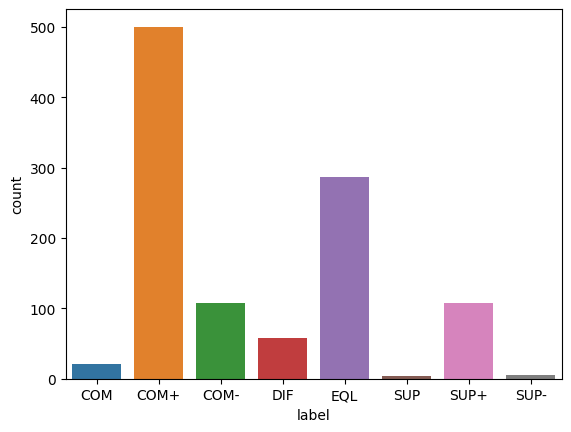

In [ ]:
sns.countplot(data=train_df, x ='label')

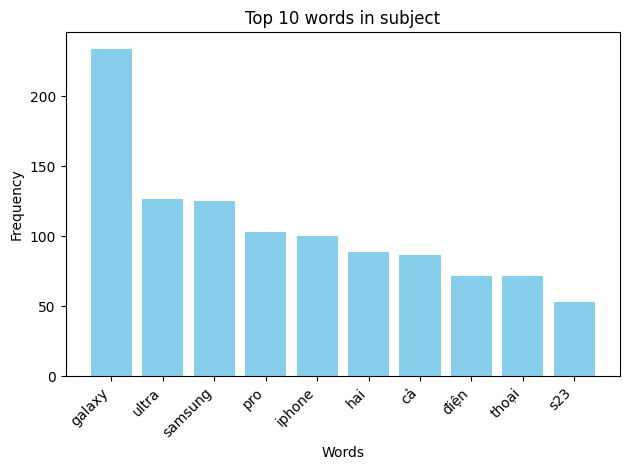

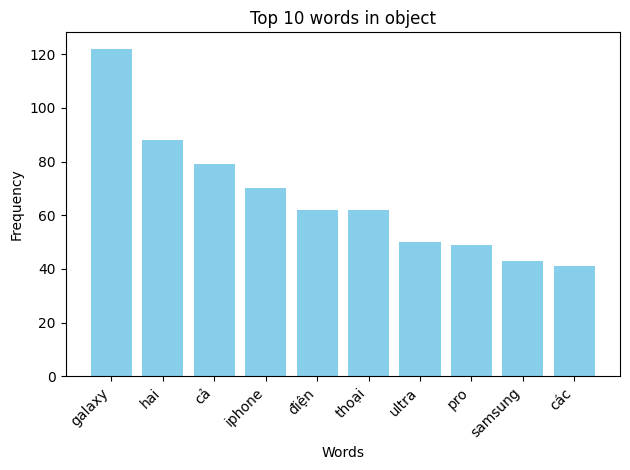

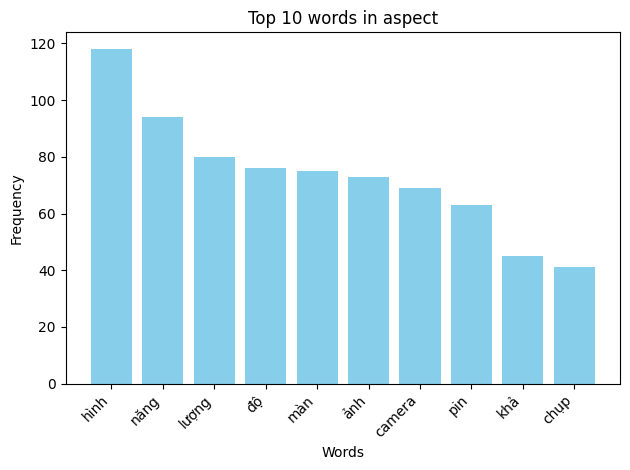

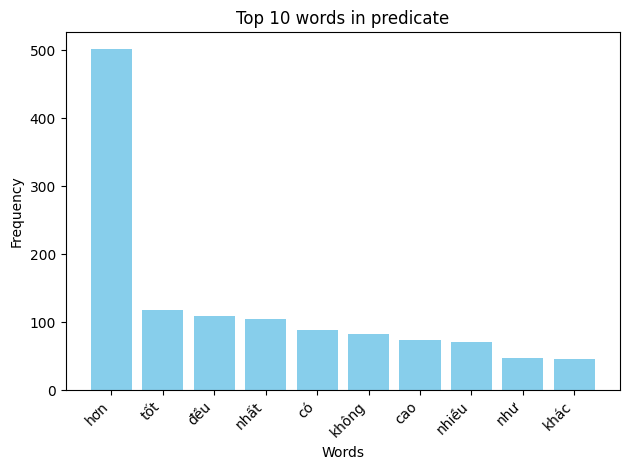

In [ ]:
from collections import Counter

# Hàm để vẽ bar chart từ danh sách từ và tần suất
def plot_bar_chart(words, frequencies, title):
    plt.bar(words, frequencies, color='skyblue')
    plt.title(title)
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Duyệt qua từng cột
for column in ["subject", "object", "aspect", "predicate"]:
    # Kết hợp tất cả các từ từ cột hiện tại vào một danh sách
    all_words = [next(iter(item.values())).lower() for sublist in train_df[column] for item in sublist]

    # Đếm tần suất của mỗi từ
    word_counts = Counter(all_words)

    # Lấy 10 từ phổ biến nhất
    most_common_words = dict(word_counts.most_common(10))

    # Tách từ và tần suất
    words, frequencies = zip(*most_common_words.items())

    # Vẽ bar chart
    plot_bar_chart(words, frequencies, f"Top 10 words in {column}")


In [ ]:
from nltk.tokenize import word_tokenize
# Kết hợp tất cả văn bản trong cột thành một chuỗi
all_text_subject = ' '.join(train_df['subject_clean'].astype(str))
all_text_object = ' '.join(train_df['object_clean'].astype(str))
all_text_aspect = ' '.join(train_df['aspect_clean'].astype(str))
all_text_predicate = ' '.join(train_df['predicate_clean'].astype(str))
# Sử dụng nltk để tách từ
tokens_subject = word_tokenize(all_text_subject)
tokens_object = word_tokenize(all_text_object)
tokens_aspect = word_tokenize(all_text_aspect)
tokens_predicate = word_tokenize(all_text_predicate)
# Đếm tần suất xuất hiện của từng từ
word_frequencies_subject = Counter(tokens_subject)
word_frequencies_object = Counter(tokens_object)
word_frequencies_aspect = Counter(tokens_aspect)
word_frequencies_predicate = Counter(tokens_predicate)
# In ra 10 từ xuất hiện nhiều nhất
print(f"subject_count: ",word_frequencies_subject.most_common(10))
print(f"object_count: ",word_frequencies_object.most_common(10))
print(f"aspect_count: ",word_frequencies_aspect.most_common(10))
print(f"predicate_count: ",word_frequencies_predicate.most_common(10))

subject_count:  [('galaxy', 234), ('ultra', 127), ('samsung', 125), ('pro', 103), ('iphone', 100), ('hai', 89), ('cả', 87), ('điện', 72), ('thoại', 72), ('s23', 53)]
object_count:  [('galaxy', 122), ('hai', 88), ('cả', 79), ('iphone', 70), ('điện', 62), ('thoại', 62), ('ultra', 50), ('pro', 49), ('samsung', 43), ('các', 41)]
aspect_count:  [('hình', 118), ('năng', 94), ('lượng', 80), ('độ', 76), ('màn', 75), ('ảnh', 73), ('camera', 69), ('pin', 63), ('khả', 45), ('chụp', 41)]
predicate_count:  [('hơn', 501), ('tốt', 117), ('đều', 109), ('nhất', 105), ('có', 89), ('không', 82), ('cao', 74), ('nhiều', 71), ('như', 47), ('khác', 45)]


Độ dài trung bình của cột 'Subject': 2.7447199265381084
Độ dài trung bình của cột 'Object': 2.039485766758494
Độ dài trung bình của cột 'Aspect': 2.8089990817263546
Độ dài trung bình của cột 'Predicate': 3.799816345270891


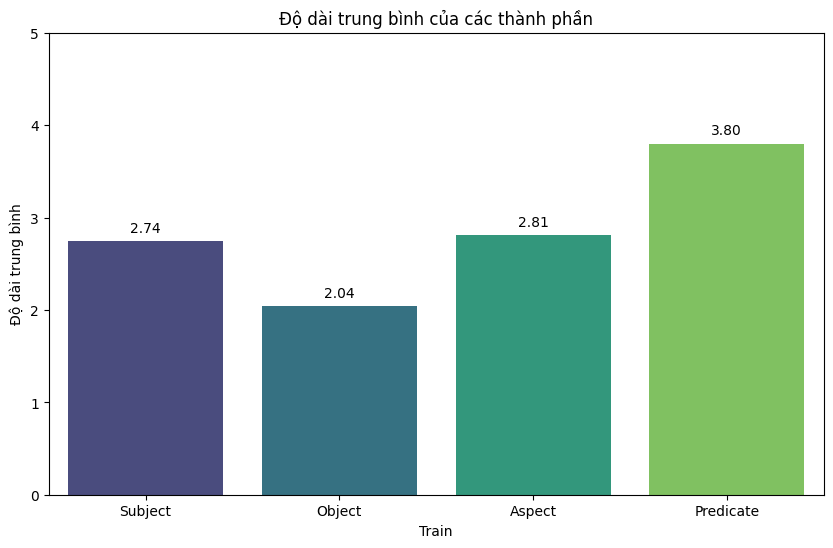

In [ ]:
# Tính độ dài trung bình chỉ cho những dòng có thông tin
average_length_s = train_df['subject_clean'].apply(lambda x: len(x.split())).mean()
average_length_o = train_df['object_clean'].apply(lambda x: len(x.split())).mean()
average_length_a = train_df['aspect_clean'].apply(lambda x: len(x.split())).mean()
average_length_p = train_df['predicate_clean'].apply(lambda x: len(x.split())).mean()

print(f"Độ dài trung bình của cột 'Subject': {average_length_s}")
print(f"Độ dài trung bình của cột 'Object': {average_length_o}")
print(f"Độ dài trung bình của cột 'Aspect': {average_length_a}")
print(f"Độ dài trung bình của cột 'Predicate': {average_length_p}")


# Tạo DataFrame cho độ dài trung bình của từng cột
data_avg = {'Cột': ['Subject', 'Object', 'Aspect', 'Predicate'],
        'Độ dài trung bình': [average_length_s, average_length_o, average_length_a, average_length_p]}

df_average_length = pd.DataFrame(data_avg)

# Vẽ biểu đồ cột với seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Cột', y='Độ dài trung bình', data=df_average_length, palette='viridis')
plt.xlabel('Train')
plt.ylabel('Độ dài trung bình')
plt.title('Độ dài trung bình của các thành phần')
plt.ylim(0, 5.0)  # Đặt giới hạn trục y để chứa số liệu

# Hiển thị giá trị trên từng cột
for i, value in enumerate(df_average_length['Độ dài trung bình']):
    plt.text(i, value + 0.1, f'{value:.2f}', ha='center')

# Hiển thị biểu đồ
plt.show()

In [ ]:
sentences = train_df['sentence_cleaned'].tolist()

In [ ]:
tokenizer = Tokenizer(oov_token='<OOV>')
tokenizer.fit_on_texts(sentences)

In [ ]:
word_index = tokenizer.word_index

In [ ]:
word_index

{'<OOV>': 1,
 'hơn': 2,
 'galaxy': 3,
 'ultra': 4,
 'samsung': 5,
 'iphone': 6,
 'pro': 7,
 'hình': 8,
 'tốt': 9,
 'nhất': 10,
 'đều': 11,
 'điện': 12,
 'camera': 13,
 'hai': 14,
 'thoại': 15,
 'năng': 16,
 'không': 17,
 'màn': 18,
 'cả': 19,
 'có': 20,
 'ảnh': 21,
 'lượng': 22,
 'cao': 23,
 'độ': 24,
 'của': 25,
 'các': 26,
 's23': 27,
 'nhiều': 28,
 'khác': 29,
 'pin': 30,
 'máy': 31,
 '2': 32,
 'này': 33,
 'z': 34,
 '13': 35,
 '11': 36,
 'trên': 37,
 'thiết': 38,
 'chụp': 39,
 'chiếc': 40,
 'tương': 41,
 'chất': 42,
 'max': 43,
 'khả': 44,
 'như': 45,
 'được': 46,
 'xiaomi': 47,
 'cấp': 48,
 'nó': 49,
 '5g': 50,
 'note': 51,
 'vượt': 52,
 'một': 53,
 'plus': 54,
 'dòng': 55,
 'thế': 56,
 'nay': 57,
 'phân': 58,
 'hiệu': 59,
 'những': 60,
 'bị': 61,
 'giá': 62,
 'trong': 63,
 'trội': 64,
 'số': 65,
 'và': 66,
 'kế': 67,
 'biệt': 68,
 'phần': 69,
 'hiện': 70,
 'lớn': 71,
 'thị': 72,
 's22': 73,
 'mạnh': 74,
 's21': 75,
 '4': 76,
 '12': 77,
 'trước': 78,
 'smartphone': 79,
 'tiết': 80,

In [ ]:
sequences = tokenizer.texts_to_sequences(sentences)

In [ ]:
padded = pad_sequences(sequences, padding='post')

In [ ]:
padded

array([[610, 792, 321, ...,   0,   0,   0],
       [  5,   3, 143, ...,   0,   0,   0],
       [ 19, 236,  40, ...,   0,   0,   0],
       ...,
       [399, 531,  65, ...,   0,   0,   0],
       [318, 217, 197, ...,   0,   0,   0],
       [  6, 120, 119, ...,   0,   0,   0]], dtype=int32)

In [ ]:
padded.shape

(1089, 29)

In [ ]:
!pip install transformers

In [ ]:
!pip install underthesea

In [ ]:
!pip install torch

In [ ]:
!pip install scikit-learn

In [ ]:
!pip install fairseq

In [ ]:
def load_bert():
    v_phobert = AutoModel.from_pretrained("vinai/phobert-base")
    v_tokenizer = AutoTokenizer.from_pretrained("vinai/phobert-base", use_fast=False)
    return v_phobert, v_tokenizer